#### Aug. 9, 2018 1pm

In [1]:
import numpy   as np
import pandas  as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing   import scale, StandardScaler
from sklearn.decomposition   import PCA, TruncatedSVD

import pickle
from nltk.corpus import stopwords

import re

---

### Large Pickled Dataset



In [2]:
%%time
df = pd.read_pickle("newRev_VegCols_US.pkl")

CPU times: user 788 ms, sys: 552 ms, total: 1.34 s
Wall time: 1.34 s


In [ ]:
# df['vegFriendly'].value_counts()

# df['useful'].value_counts()[1:10]

# df['useful'].value_counts()[1:].sum() / df['useful'].value_counts().sum()

# df['useful'].value_counts()[1:].sum() 

In [3]:
X_df = df.drop(['vegFriendly', 'Vegan', 'Vegetarian'], axis=1)
y_df = df['vegFriendly']

In [4]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923002 entries, 0 to 923001
Data columns (total 17 columns):
business_id    923002 non-null object
name           923002 non-null object
review_id      923002 non-null object
stars          923002 non-null int64
date           923002 non-null datetime64[ns]
text           923002 non-null object
useful         923002 non-null int64
funny          923002 non-null int64
cool           923002 non-null int64
city           923002 non-null object
state          923002 non-null object
Thai           923002 non-null float64
Italian        923002 non-null float64
Indian         923002 non-null float64
Chinese        923002 non-null float64
Mexican        923002 non-null float64
Text_length    923002 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(6)
memory usage: 119.7+ MB


In [5]:
%%time
X_df.iloc[:, 5] = X_df['text'].apply( lambda rev: re.sub(r'(\d+)', '', rev) )

CPU times: user 16.3 s, sys: 112 ms, total: 16.4 s
Wall time: 16.4 s


In [6]:
%%time
X_df.iloc[:, 5] = X_df['text'].apply( lambda rev: rev.replace('_', '') )

CPU times: user 652 ms, sys: 0 ns, total: 652 ms
Wall time: 653 ms


In [ ]:
# %%time
# X_df.iloc[:, 5] = X_df['text'].apply( lambda rev: re.sub(r'^[a]*[a-zA-Z]*$', '', rev) )

# %%time
# X_df.iloc[:, 5] = X_df['text'].apply( lambda rev: re.sub(r'a{3,}.*', '', rev) )

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3)

In [8]:
print( X_train.shape, X_test.shape)

(646101, 17) (276901, 17)


---

### Manipulate data sets

In [9]:
stopWords = list(stopwords.words('english'))
stopWords.extend(['good', 'excellent', 'best', 'like', 'place', 'really', 'ordered', 'amazing', 'fantastic', 'am', 'pm'])

In [10]:
vectorizer = TfidfVectorizer(stop_words=stopWords)

#### Vectorize Review Text

In [11]:
%%time
X_train_term  = vectorizer.fit_transform(X_train['text'])

CPU times: user 43.7 s, sys: 636 ms, total: 44.4 s
Wall time: 44.4 s


In [12]:
X_train_term.shape

(646101, 141232)

In [13]:
ftrs = vectorizer.get_feature_names()

In [14]:
ftrs

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaaaaaaaaand',
 'aaaaaaaaaaaaaauthentic',
 'aaaaaaaaaaaaahhhhhhh',
 'aaaaaaaaaaack',
 'aaaaaaaaaaah',
 'aaaaaaaaaah',
 'aaaaaaaaaand',
 'aaaaaaaahhhhhhhhh',
 'aaaaaaaahhhhmazing',
 'aaaaaaaamazing',
 'aaaaaaaand',
 'aaaaaaaawesooooooooooooome',
 'aaaaaaahhhhhh',
 'aaaaaaall',
 'aaaaaaamaaaaazing',
 'aaaaaaamazing',
 'aaaaaaand',
 'aaaaaahhhh',
 'aaaaaahhhhh',
 'aaaaaamazing',
 'aaaaaand',
 'aaaaaannnddd',
 'aaaaaannnndddd',
 'aaaaagh',
 'aaaaah',
 'aaaaahhhh',
 'aaaaahhhhhh',
 'aaaaahhhhhhmazing',
 'aaaaahhhhmaaazeballs',
 'aaaaahhhhmazing',
 'aaaaamaaazing',
 'aaaaamazing',
 'aaaaammmaazzzinnngg',
 'aaaaand',
 'aaaaarrrggghh',
 'aaaaawful',
 'aaaaay',
 'aaaack',
 'aaaagh',
 'aaaah',
 'aaaahhh',
 'aaaahhhh',
 'aaaahhhhhhh',
 'aaaahhhhhhs',
 'aaaahmazzzing',
 'aaaajúa',
 'aaaallright',
 'aaaamaaazing',
 'aaaamazing',
 'aaaamazzzzing',
 'aaaammaaazzinnnggg',
 'aaaammaaazzziiingggg',
 'aaaammazzing',
 'aaaammmaaaaazzzziiiinnnngggg',
 'aaa

#### Reduce Dimensionality

In [15]:
svd = TruncatedSVD(n_components=120, n_iter=7)

In [16]:
%%time
X_train_term_svd = svd.fit_transform(X_train_term)  

CPU times: user 1min 50s, sys: 9.38 s, total: 1min 59s
Wall time: 1min 12s


In [17]:
svd.singular_values_

array([130.57719979,  58.91467945,  57.17188445,  54.38733755,
        50.78579584,  45.59531852,  45.17060957,  43.21420376,
        41.89213369,  39.90082228,  38.63612573,  38.51533399,
        37.63498773,  37.03297504,  36.91201108,  36.48508225,
        36.04313605,  35.50396906,  34.86269412,  34.79708782,
        34.59454701,  34.45748375,  33.90420768,  33.04732832,
        32.87324057,  32.69711648,  32.61270921,  32.34800334,
        32.10829907,  32.05563128,  31.7700377 ,  31.63734895,
        31.47273701,  31.29264873,  30.95593172,  30.91714579,
        30.71967162,  30.61395019,  30.36002474,  30.25401261,
        30.11393575,  29.98129477,  29.7971285 ,  29.64053111,
        29.29489817,  29.24926701,  29.12805799,  29.04185685,
        28.88850661,  28.86226849,  28.6751323 ,  28.58914482,
        28.51830755,  28.48307417,  28.35889381,  28.30496085,
        28.22268917,  28.17390358,  28.09911491,  28.00980426,
        27.91850729,  27.80422613,  27.70019583,  27.64

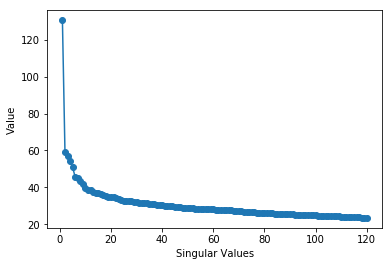

In [18]:
s = svd.singular_values_

x = [i+1 for i in range(len(s))]
plt.plot(x, s, marker='o')
plt.xlabel("Singular Values")
plt.ylabel("Value");

---

### Percentage of Variance Explained

In [19]:
print("Percentage of explained variance (dimRed)", svd.explained_variance_ratio_.sum()*100)

Percentage of explained variance (dimRed) 17.95554121606649


---

#### Random Forest - Train

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
%%time
RF_model = RandomForestClassifier(n_jobs=-1, n_estimators=800)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 37.2 µs


In [22]:
%%time
RF_model.fit(X_train_term_svd, y_train)

CPU times: user 3h 22min 9s, sys: 5.01 s, total: 3h 22min 14s
Wall time: 25min 55s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

---

#### Random Forest - Test

In [23]:
%%time
X_test_term = vectorizer.transform(X_test['text'])

CPU times: user 19.3 s, sys: 220 ms, total: 19.5 s
Wall time: 19.5 s


In [24]:
X_test_term.shape

(276901, 141232)

In [25]:
%%time
X_test_term_svd = svd.transform(X_test_term)

CPU times: user 1.3 s, sys: 540 ms, total: 1.84 s
Wall time: 1.84 s


In [26]:
X_test_term_svd.shape

(276901, 120)

In [27]:
%%time
pred = RF_model.predict(X_test_term_svd)

CPU times: user 2min 6s, sys: 140 ms, total: 2min 6s
Wall time: 16.3 s


In [28]:
len(pred)

276901

In [29]:
pred[:30]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
np.unique(pred)

array([0., 1.])

In [31]:
y_test[:10]

797066    0.0
436266    0.0
327599    1.0
882862    1.0
503461    0.0
750771    0.0
652354    0.0
214684    0.0
180716    0.0
868921    1.0
Name: vegFriendly, dtype: float64

In [32]:
pred[:10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [34]:
lbls = ['vegFriendly', 'Non-vegFriendly']

cm = confusion_matrix(y_test, pred)
cm

array([[219413,    826],
       [ 24049,  32613]])

In [35]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95    220239
        1.0       0.98      0.58      0.72     56662

avg / total       0.92      0.91      0.90    276901



In [36]:
accuracy_score(y_test, pred)

0.9101664493808257

In [37]:
precision_score(y_test, pred)

0.9752983043751309

In [38]:
recall_score(y_test, pred)

0.575570929370654

In [39]:
f1_score(y_test, pred)

0.7239209331749924

Confusion matrix, without normalization


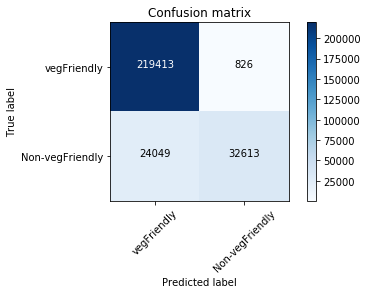

In [42]:
plot_confusion_matrix(cm,lbls)

In [43]:
importances = RF_model.feature_importances_

importances

array([0.00938292, 0.0160177 , 0.00753403, 0.01618676, 0.01066574,
       0.01031367, 0.01025297, 0.02321441, 0.011424  , 0.00770631,
       0.0077324 , 0.01315669, 0.01415326, 0.01011171, 0.00985808,
       0.00949453, 0.02458342, 0.01495827, 0.01107196, 0.00883168,
       0.01484295, 0.0123007 , 0.01340884, 0.00817569, 0.00978501,
       0.02609973, 0.00706949, 0.00773592, 0.00687618, 0.00706413,
       0.00696173, 0.0078926 , 0.00872917, 0.00734738, 0.01005528,
       0.00695974, 0.00813722, 0.00725661, 0.00787161, 0.00776857,
       0.0072709 , 0.00745466, 0.00799969, 0.00713025, 0.006945  ,
       0.0067391 , 0.00676935, 0.00753202, 0.00677538, 0.00817838,
       0.00703295, 0.00693176, 0.00696802, 0.00868318, 0.0069276 ,
       0.0070106 , 0.00678967, 0.00681863, 0.00682587, 0.0065522 ,
       0.006928  , 0.00657936, 0.00682748, 0.0066382 , 0.00739659,
       0.00678911, 0.00705761, 0.00709319, 0.00690357, 0.00685005,
       0.00676447, 0.00671987, 0.00709546, 0.00692924, 0.00674

In [44]:
indices = np.argsort(importances)[::-1]
indices

array([ 25,  16,   7,   3,   1,  17,  20,  12,  22,  11,  21,   8,  18,
         4,   5,   6,  13,  34,  14,  24,  15,   0,  19,  32,  53,  49,
        23,  36,  42,  31,  38,  39,  27,  10,   9, 108, 110,   2,  47,
       103,  84,  41,  80,  64,  33,  40, 115,  37, 118, 105,  94,  78,
       114,  43, 113,  96,  72,  67,  79, 112,  77,  26,  29,  85,  66,
       106,  50,  55, 117, 109, 111,  52, 119,  30,  98,  35,  44,  90,
        51,  87,  73,  60,  54, 104,  68, 116,  28,  81,  69,  62,  58,
        57, 102, 107,  95,  56,  65,  88,  97,  75,  48,  99,  46,  91,
        70,  76,  89,  74, 101,  45,  71,  83,  92,  82,  93,  86,  63,
       100,  61,  59])

In [59]:
indices = indices.reshape(1,120)

In [60]:
important_words = svd.inverse_transform(np.array(indices))

In [61]:
important_words.shape

(1, 141232)

In [62]:
iw_ind = np.argsort(important_words)[::-1]
iw_ind

array([[ 11683,   5981,  79778, ...,  18168, 118618, 110278]])

In [63]:
stop = 100
cnt = 0
for ind in iw_ind[0]:
    print(ftrs[ind])
    if cnt == stop:
         break
    cnt += 1

better
area
much
even
come
delicious
fresh
quality
atmosphere
friendly
sauce
went
buffet
taste
mexican
though
back
wait
restaurant
meat
take
staff
soup
say
fish
awesome
still
beef
eat
made
every
pretty
little
dish
new
think
table
must
one
service
tacos
last
drinks
beans
times
restaurants
order
tea
ingredients
week
sour
vegan
bar
used
cream
chinese
guacamole
thai
high
phoenix
sweet
friends
chipotle
tasted
steak
ice
something
waiter
bland
family
margaritas
dinner
attentive
always
average
day
enjoyed
thing
margarita
tasty
fun
drink
going
enchiladas
pork
cooked
hot
dry
pasta
visit
dessert
places
highly
burrito
year
friend
flavor
bartender
maybe
years
black


In [53]:
y_score = RF_model.predict_proba(X_test_term_svd)[:,1]

In [54]:
y_score[:10]

array([0.1525 , 0.24625, 0.17   , 0.71875, 0.115  , 0.0925 , 0.18875,
       0.22875, 0.21375, 0.27875])

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)

AUC score: 0.8968468007748743


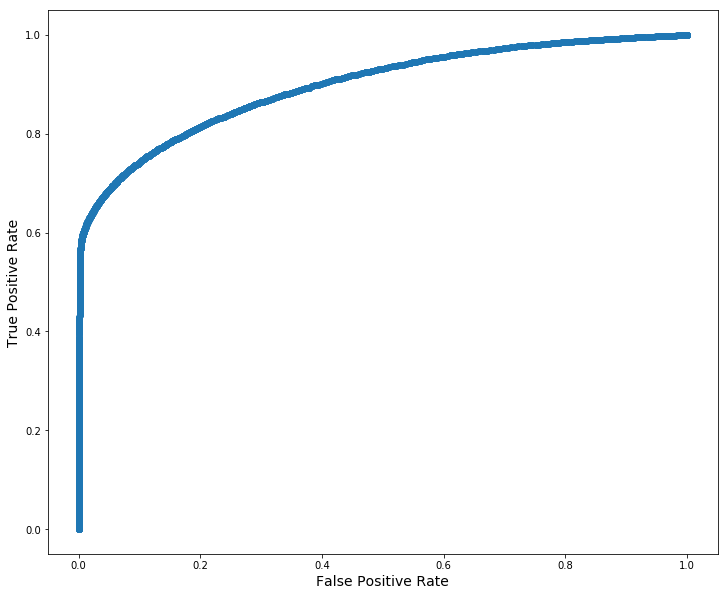

In [58]:
plt.figure(figsize=(12,10))
plt.plot(fpr, tpr, 'o--')
plt.ylabel("True Positive Rate",  fontsize=14)
plt.xlabel("False Positive Rate", fontsize=14);
print("AUC score:", roc_auc_score(y_test, y_score))

---

#### Pickle models

In [64]:
import pickle

In [1]:
pickle.dump(vectorizer, open('pkl_tfidf_stpWds.p','wb'))
pickle.dump(svd, open('pkl_svd_120_comp.p','wb'))
pickle.dump(RF_model, open('pkl_rf_800_trees.p','wb'))

NameError: name 'pickle' is not defined

In [ ]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [41]:
import itertools 
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')